In [202]:
import pandas as pd

In [203]:
dataset = pd.read_excel("processed_batch (3).xlsx")

In [204]:
dataset

,Reviewer,Review date,Description,Rating,OPINION_UNIT,Classification,Confidence,Classification.1,Confidence.1
0,Shuttitt Uppitt,"February 2, 2020","(3.2.7) It works fine. It's smart to put the ""...",Rated 5 stars out of five stars,(3.2.7) It works fine.,Ease of Use,0.465,Positive,0.957
1,NaN,NaN,NaN,NaN,"It's smart to put the ""Delete"" option at the B...",Features,0.427,Neutral,0.539
2,NaN,NaN,NaN,NaN,(At other users.,Ease of Use,0.493,Neutral,0.756
3,NaN,NaN,NaN,NaN,Use FILE MANAGERS to delete videos/ images/ mu...,Ease of Use,0.522,Neutral,0.351
4,NaN,NaN,NaN,NaN,Now I hope to see better performance for non S...,Features,0.684,Negative,0.818
...,...,...,...,...,...,...,...,...,...
248,NaN,NaN,NaN,NaN,Get the COMPLETE PACKAGE with VLC Player.,NaN,NaN,Neutral,0.682
249,NaN,NaN,NaN,NaN,"When new codecs become available, they will be...",Features,0.618,Neutral,0.699
250,NaN,NaN,NaN,NaN,I haven't used another video player in YEARS!,Features:Ease of Use,0.532:0.458,Positive,0.786
251,Terence 1Plus,"February 5, 2020",,Rated 5 stars out of five stars,NaN,NaN,NaN,Positive,0.984


In [205]:
opinion_unit = list(dataset['OPINION_UNIT'])
class1 = list(dataset['Classification'])
score = list(dataset['Classification.1'])

In [206]:
f_opinion_unit = []
f_class1 = []
f_score = []
for i in range(len(score)):
    if(score[i]!="Positive"):
        if(opinion_unit[i]!='nan'):
             if(class1[i]!='nan'):
                f_opinion_unit.append(opinion_unit[i])
                f_class1.append(class1[i])
                f_score.append(score[i])
        
# print(len(f_score))

In [207]:
print(list(dataset['OPINION_UNIT'])[251], type(dataset['OPINION_UNIT'][251]))

nan <class 'float'>


In [208]:
for i in range(len(f_score)):
    print(f_opinion_unit[i])
    print()
    print(f_class1[i])
    print()
    print(f_score[i])
    print()

It's smart to put the "Delete" option at the BOTTOM of the list.

Features

Neutral

(At other users.

Ease of Use

Neutral

Use FILE MANAGERS to delete videos/ images/ music/ others.)

Ease of Use

Neutral

Now I hope to see better performance for non SUPER hardware.

Features

Negative

Example = One of my phones has 2 GB of RAM, 

Features

Neutral

but only 480x854 resolution.

nan

Neutral

I want to be able to play 1080p at full speed.

Features

Neutral

Twice now in the past couple of months, I have had all my TV shows and movies downloaded here and twice within a couple of days most or partial of them are gone?

nan

Negative

I don't know if this has to do with an update, 

nan

Neutral

but whatever it is it's not working.

Ease of Use

Negative

Frustrating having to go back and put them in again...

Ease of Use

Negative

Please fix this.

Ease of Use

Negative

Seek track is impossible to use.

Ease of Use

Negative

Whether I hold the fast forward or rewind button, tap t

In [209]:
d = pd.read_csv('processed.csv')

In [210]:
d

,Name,Review,UpVotes,Rating,Date
0,Shuttitt Uppitt,(3.2.7) It works fine. It's smart to put the D...,417.0,4.4,"February 2, 2020"
1,Nate,Seek track is impossible to use. Whether I hol...,627.0,5.0,"February 4, 2020"
2,Sir Willard,I've been using the VLC Windows application fo...,97.0,2.0,"February 4, 2020"
3,Chris L,The updates just make it worse. I used to like...,210.0,2.0,"February 10, 2020"
4,Peter Blaikie,I love VLC on my PC. Used to like it on my And...,22.0,1.0,"February 14, 2020"
...,...,...,...,...,...
835,Jonathan Veith,all of a sudden playlist view its stuck on thu...,1.0,5.0,"December 11, 2019"
836,Big Fat Frosty,No networks try again for few minutes on opens...,2.0,2.0,"December 10, 2019"
837,Howard Denardo,Work fine for all files. I can stream files fr...,NaN,1.0,"December 31, 2019"
838,Daniel Branco,New version is bad I try to stop video by doub...,NaN,3.0,"December 23, 2019"


In [211]:
review = list(d['Review'])

In [212]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [213]:
from nltk import FreqDist
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/rishitha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [214]:
import numpy as np
import re
import spacy

import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [215]:
d.head()

,Name,Review,UpVotes,Rating,Date
0,Shuttitt Uppitt,(3.2.7) It works fine. It's smart to put the D...,417.0,4.4,"February 2, 2020"
1,Nate,Seek track is impossible to use. Whether I hol...,627.0,5.0,"February 4, 2020"
2,Sir Willard,I've been using the VLC Windows application fo...,97.0,2.0,"February 4, 2020"
3,Chris L,The updates just make it worse. I used to like...,210.0,2.0,"February 10, 2020"
4,Peter Blaikie,I love VLC on my PC. Used to like it on my And...,22.0,1.0,"February 14, 2020"


In [216]:
def freq_words(x, terms = 50):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()

    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

    # selecting top 20 most frequent words
    d = words_df.nlargest(columns="count", n = terms) 
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.show()

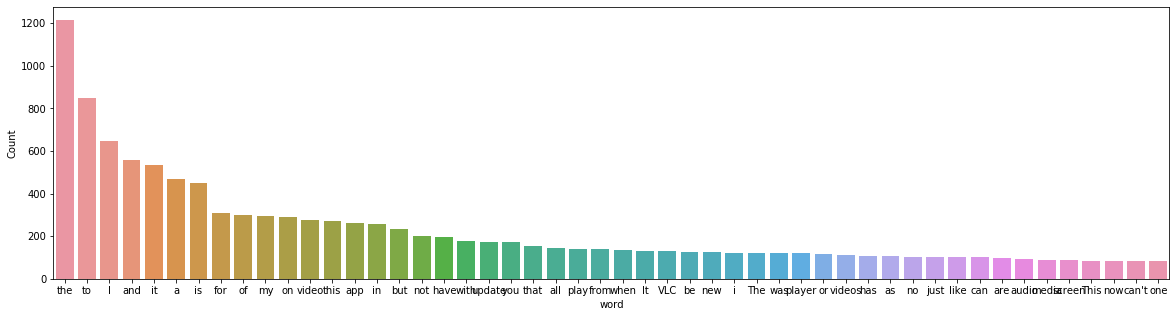

In [217]:
freq_words(d['Review'])

In [218]:
d['Review'] = d['Review'].str.replace("[^a-zA-Z#]", " ")

In [219]:
stop_words = stopwords.words('english')

In [220]:
# function to remove stopwords
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new

In [221]:
# remove short words (length < 3)
d['Review'] = d['Review'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

In [222]:
# remove stopwords from the text
reviews = [remove_stopwords(r.split()) for r in d['Review']]

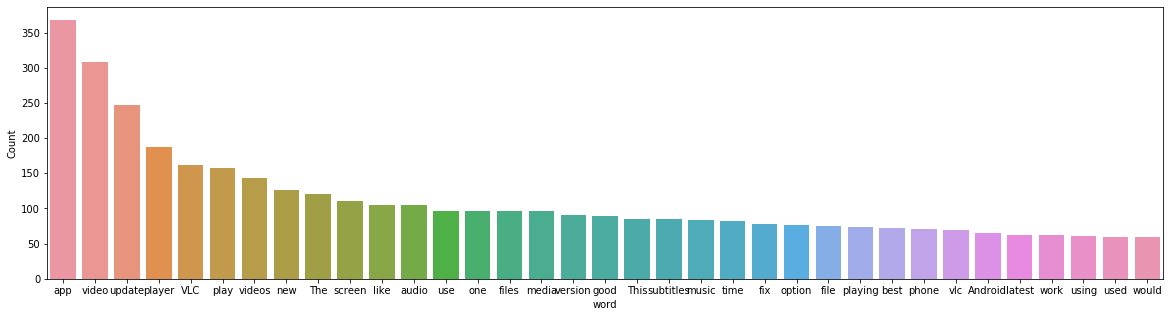

In [223]:
freq_words(reviews, 35)

In [224]:
opinion_units = []
for r in review:
    temp = r.split(".")
    l = []
    for t in temp:
        text1=nltk.word_tokenize(t)
        text2=[word.lower() for word in text1 if (word not in stop_words) and word.isalnum()]
        l.append(text2)
    opinion_units.append(l)
    
print(opinion_units)
# l = review[0].split(".")

[[['3'], ['2'], ['7', 'it', 'works', 'fine'], ['it', 'smart', 'put', 'delete', 'option', 'bottom', 'list'], ['at', 'users'], ['use', 'file', 'managers', 'delete', 'videos', 'images', 'music', 'others'], ['now', 'i', 'hope', 'see', 'better', 'performance', 'non', 'super', 'hardware'], ['example', 'one', 'phones', '2', 'gb', 'ram', '480x854', 'resolution'], ['i']], [['seek', 'track', 'impossible', 'use'], ['whether', 'i', 'hold', 'fast', 'forward', 'rewind', 'button', 'tap', 'progress', 'bar', 'drag', 'dot', 'progress', 'bar', 'input', 'seek', 'time', 'manually', 'nothing', 'works'], ['the', 'behavior', 'erratic'], ['this', 'app', 'impossible', 'use', 'listening', 'audiobooks'], ['8', 'hours', 'one', 'sitting', 'br']], [['i', 'using', 'vlc', 'windows', 'application', 'years', 'better', 'others', 'i', 'tried'], ['this', 'reason', 'choosing', 'app'], ['however', 'recent', 'update', 'shrank', 'tool', 'bar', 'less', 'full', 'screen', 'width', 'removed', 'ability', 'refresh', 'play', 'list', 

In [225]:
l

[['full',
  'bugs',
  'update',
  'video',
  'plays',
  'seeking',
  '1080p',
  'vids',
  'video',
  'freezes'],
 [],
 [],
 ['every', 'update', 'vlc', 'gets', 'ruined']]

In [226]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import pandas, xgboost, numpy, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

### Create Label Class Vector

In [227]:
label_map = {}

label_map['Bug'] = "issue, issues, erratic, impossible, hindrance, crash, crashes, restarts, pauses, bug, worse, bad, bugs, buggy, error, errors"
label_map['Documentation'] = "docs, documentation, article, articles, help article, FAQ, FAQs"
label_map['Feature Request'] = "wish, add, would like, feature, option, attribute, delete"
label_map["Implementation"] = "implement, implemented, implementation, setup, set-up"
label_map['Integration'] = "integration, integrate, integrates"
label_map['Performance'] = "speed, slow, fast, uptime, downtime, hours, 404"
label_map['Price'] = "cheap, expensive, promo, promotion, deal, price, price tag"
label_map['Support'] = "support, onboarding, on-boarding, issue, broken, assistance, service, tech support, help, helps, helping"
label_map['neutral'] = 'good, nice, smart, foolish, love, like'

In [228]:
from nltk.corpus import wordnet

In [229]:
label_list = []
for key, val in label_map.items():
    l = val.split(", ")
    l = list(set(l))
    for w in l:
        temp_l = []
        for syn in wordnet.synsets(w):
            for k in syn.lemmas():
                temp_l.append(k.name())
    for w in temp_l:
        l.append(w)
    label_list.append(list(set(l)))
print(label_list)

[['restarts', 'pauses', 'crashes', 'buggy', 'issues', 'worse', 'unsufferable', 'error', 'unacceptable', 'out_of_the_question', 'erratic', 'errors', 'inconceivable', 'bad', 'crash', 'bug', 'bugs', 'issue', 'impossible', 'unimaginable', 'hindrance', 'insufferable'], ['documentation', 'FAQs', 'article', 'FAQ', 'articles', 'docs', 'help article'], ['wish', 'feature', 'ascribe', 'dimension', 'assign', 'would like', 'impute', 'option', 'delete', 'add', 'property', 'attribute'], ['implemented', 'implementation', 'set-up', 'frame-up', 'implement', 'apparatus', 'setup'], ['incorporate', 'integrate', 'mix', 'desegregate', 'integration', 'integrates'], ['hours', 'uptime', 'fast', '404', 'slow', 'speed', 'downtime'], ['price tag', 'cheap', 'promotion', 'price', 'promo', 'deal', 'expensive'], ['onboarding', 'broken', 'service', 'help', 'on-boarding', 'helps', 'assistance', 'issue', 'support', 'helping', 'tech support'], ['salutary', 'in_force', 'beneficial', 'unspoilt', 'practiced', 'commodity', 'n

### Text similarity methods 
### 1 - Jaccard Similarity

In [230]:
class_label = []
labels_name = list(label_map.keys())
print(labels_name)
for review in opinion_units:
    label = []
    for unit in review:
        a = set(unit)
        score = 0 
        temp_label = "" 
        label_count = 0
        for l in label_list:
            b = set(l)
            c = a.intersection(b)
            s = float(len(c)) / (len(a) + len(b) - len(c))
            print(s)
            if(s>score):
                temp_label = labels_name[label_count]
            label_count+=1
            if(temp_label == ""):
                temp_label = "Redundant/NA"
        print(unit, temp_label)
        label.append(temp_label)
    class_label.append(label)
    
    

['Bug', 'Documentation', 'Feature Request', 'Implementation', 'Integration', 'Performance', 'Price', 'Support', 'neutral']
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['3'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['2'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['7', 'it', 'works', 'fine'] Redundant/NA
0.0
0.0
0.11764705882352941
0.0
0.0
0.0
0.0
0.0
0.020833333333333332
['it', 'smart', 'put', 'delete', 'option', 'bottom', 'list'] neutral
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['at', 'users'] Redundant/NA
0.0
0.0
0.05263157894736842
0.0
0.0
0.0
0.0
0.0
0.0
['use', 'file', 'managers', 'delete', 'videos', 'images', 'music', 'others'] Feature Request
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['now', 'i', 'hope', 'see', 'better', 'performance', 'non', 'super', 'hardware'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['example', 'one', 'phones', '2', 'gb', 'ram', '480x854', 'resolution'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['i'] Redundant/NA
0.04
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.

0.0
0.043478260869565216
0.0
['if', 'would', 'issue', 'i', 'would', 'given', '5', 'star', 'ratings', 'cause', 'vlc', 'best', 'player', 'andr'] Support
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.019230769230769232
['wo', 'play', 'mkv', 'files', 'i', 'love', 'vlc', 'computer', 'used', 'long', 'i', 'remember'] neutral
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['i', 'knew', 'app', 'i', 'got', 'pretty', 'excited'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['however', 'i', 'ca', 'seem', 'make', 'play', 'mkv', 'files'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['i', 'tried', 'multiple', 'videos', 'first', 'frame', 'plays', 'audio', 'works', 'fine'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
[] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
[] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['the', 'f'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['hii'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['im', 'stugeling', 'download', 'videos', 'tubidy', 'site'] Redundant/NA
0.0
0.

0.0
0.0
0.0
0.0
0.0
0.0
[] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['hello', 'i', 'ca', 'connect', 'smb', 'anymore', '3'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['2'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['7', 'version', 'ninkbox', 'android', 'tv'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['worked', 'fine', '3'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['1'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['6'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['what', 'happens', 'please', 'fix'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
[] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['although', 'great', 'media', 'player', 'major', 'problem', 'subtitles', 'get', 'cropped', 'i', 'change', 'screen', 'aspect', 'ratio'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
[] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['this', 'used', 'best', 'video', 'player', 'app'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['not'] Redun

0.0
0.0
0.0
['there', 'constant', 'bug', 'whereby', 'everytime', 'i', 'open', 'app', 'starts', 'parsing', 'media', 'app', 'size', 'grows', '2', 'gigs', 'keeps', 'growing'] Bug
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.018518518518518517
['fix', 'mess', 'this', 'media', 'player', 'heavy', 'game', 'like', 'pubg', 'require', 'large', 'memory', 'occupation'] neutral
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['fix', 'cause', 'annoying'] Redundant/NA
0.03125
0.0
0.0
0.0
0.0
0.0
0.0
0.047619047619047616
0.0
['i', 'thought', 'i', 'would', 'explain', '3', 'weeks', 'gone', 'i', 'seen', 'changes', 'subtitle', 'issue'] Support
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['first', 'i', 'say', 'i', 'using', 'vlc', 'sony', 'android', 'tv'] Redundant/NA
0.0
0.0
0.043478260869565216
0.0
0.0
0.0
0.0
0.0
0.0
['before', 'latest', 'update', 'easy', 'add', 'saved', 'subtitle', 'file', 'srt', 'using', 'tv', 'remote'] Feature Request
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['you', 'could', 'navigate', 'fil'] Redundant/NA
0.02439024390

0.0
0.0
0.0
0.0
0.0
0.0
['apolog'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['i', 'using', 'vlc', 'years', 'desktop', 'android', 'versions'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['since', 'latest', 'update', 'little', 'trouble', 'screen', 'ratio', 'auto', 'adjusting', 'acer', 'chromebook', '15'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['once', 'i', 'load', 'video', 'play', 'bottom', 'screen', 'cut', 'play', 'button', 'i'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['clean', 'interface', 'intuitive', 'navigation', 'plenty', 'features', 'ads', 'incredibly'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['edit', 'the', 'subtitles', 'load', 'middle', 'playback', 'running', 'subtitle', 'first', 'appears'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['on', 'device', 'subtitle', 'settings', 'change', 'nothing', 'pulling', 'edge', 'device'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['sometimes', 'vlc', 'closes', 'reason', 'even', 'i', 'set', 'h

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
[] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['but', 'unfortunately', 'i'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
[] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
[] Redundant/NA
0.0
0.0
0.05263157894736842
0.0
0.0
0.0
0.0
0.0
0.0
['i', 'happy', 'casting', 'option', 'enabled', 'i', 'still', 'enjoying', 'fe'] Feature Request
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['vlc', 'taken', 'next', 'lvl', 'eq', 'improved', 'drastically'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.022727272727272728
['quality', 'good', 'stunned'] neutral
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['waiting', 'long', 'time', 'improvement', 'eq', 'area', 'finally', 'come', 'increase', 'volume', 'headphones', 'without', 'losing', 'alot', 'clarity'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['best', 'free', 'videomusic', 'player'] Redundant/NA
0.038461538461538464
0.0
0.0
0.0
0.0
0.0
0.0
0.06666666666666667
0.0
['i', 'issue', 'music', 'genre', 'tab'] Support
0.0


['20200111', 'lowered', 'stars', '4', '3', 'weakness', 'internet', 'stream', 'interface'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['does', 'maintain', 'audio', 'track', 'play', 'order', 'connected', 'chromecast', 'audio', 'sinks', 'audio', 'tracks', 'randomly', 'start', 'stop'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['additionally', 'internet', 'stream', 'interface', 'weak', 'best'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['other', 'uri', 'entry', 'fie'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.02
['just', 'downloaded', 'update', 'still', 'sort', 'files', 'date', 'added', 'folder'] neutral
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['this', 'basic', 'requirement'] Redundant/NA
0.0
0.0
0.05
0.0
0.0
0.0
0.0
0.0
0.0
['search', 'engines', 'show', 'basic', 'feature', 'vlc', 'asked', 'five', 'years'] Feature Request
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['not', 'acceptable', 'comment', 'only', 'reason', 'keep', 'trying', 'vlc', 'app', 'uses', 'little', 'bat'] Redunda

0.0
0.0
0.0
0.0
['android', 'ver'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['still', 'solution'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['same', 'mxplayer'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['mi', 'videos', 'run', 'ts'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['files', 'ca', 'find', 'playstore'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['the', 'app', 'used', 'work', 'fine'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.022222222222222223
['now', 'load', 'videos', 'right'] neutral
0.0
0.0
0.05
0.0
0.0
0.0
0.0
0.0
0.0
['if', 'i', 'delete', 'video', 'title', 'video', 'still', 'i', 'click', 'goes', 'another', 'video'] Feature Request
0.03571428571428571
0.0
0.0
0.0
0.0
0.0
0.0
0.058823529411764705
0.0
['even', 'refreshing', 'screen', 'reopening', 'app', 'issue', 'still'] Support
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['this', 'goddamn', 'worst', 'app'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.058823529411764705
0.0
['you', 'guys', 'even',

0.0
0.0
0.0
0.0
0.0
0.0
['the', 'complete', 'song', 'plays', 'going', 'particular', 'part', 'track', 'possible'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
[] Redundant/NA
0.0
0.0
0.05
0.0
0.0
0.0
0.0
0.0
0.0
['please', 'add', 'exit', 'arrow', 'watching', 'videos', 'otherwise', 'app', 'awesome'] Feature Request
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
[] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['thank'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
[] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
[] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['the', 'latest', 'update', 'complete', 'train', 'wreck'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['i', 'use', 'tv', 'reason', 'networked', 'directories', 'wo', 'load', 'video', 'starts', 'letter', 'g'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['the', 'alphabet', 'exist', 'beyond', 'g'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
[] Redundant/NA
0.034482758620689655
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['i', '

['since', 'idiot', 'decided', 'delete', 'ability', 'adjust', 'eq', 'i', 'looking', 'new', 'player'] Feature Request
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['if', 'i', 'wanted', 'level', 'handcuffs', 'i', 'use', 'apple', 'product'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['a', 'shame'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
[] Redundant/NA
0.0
0.0
0.06666666666666667
0.0
0.0
0.0
0.0
0.0
0.0
['i', 'wish', 'i', 'never', 'updated'] Feature Request
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['keeps', 'crashing', 'i', 'pause', 'minute', 'try', 'resume'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['also', 'keeps', 'forgetting', 'library', 'despite', 'set', 'rescan'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
[] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['best', 'best'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['now', 'i', 'choose', 'subtitles', 'audio', 'track'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.021739130434782608
['plus', 'sound', 'available',

0.0
[] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['please', 'change', 'ui', 'design', 'next', 'update'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
[] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['thanks'] Redundant/NA
0.0
0.0
0.041666666666666664
0.05263157894736842
0.0
0.0
0.0
0.0
0.0
['feature', 'request', 'already', 'implemented', 'desktop', 'version', 'unable', 'play', 'playlist', 'file', 'm3u', 'containing', 'time'] Implementation
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0196078431372549
['vlc', 'starts', 'start', 'time', 'given', 'play', 'full', 'content', 'till', 'end'] neutral
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
[] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['i', 'bet', 'best', 'free', 'video', 'player', 'play', 'store'] Redundant/NA
0.0
0.0
0.06666666666666667
0.0
0.0
0.0
0.0
0.0
0.0
['you', 'get', 'feature', 'free'] Feature Request
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['include', 'you', 'play', 'music', 'storage', 'stream', 'video', 'online'] Redundant/NA
0.0


0.0
0.0
0.0
0.0
['used', 'great', 'app'] Redundant/NA
0.04
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['please', 'fix', 'latest', 'bugs'] Bug
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
[] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['really', 'appreciate', 'hard', 'work', 'background', 'order', 'us', 'enjoy', 'app'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['i', 'tried', 'failure', 'breaking', 'playing', 'app'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.02127659574468085
['well', 'done', 'high', 'appreciate', 'great', 'work'] neutral
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
[] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['will', 'accept', 'save', 'logon', 'information', 'lan', 'drive'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['it', 'used', 'problem', 'last', 'couple', 'updates'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
[] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['excellent', 'app', 'better', 'paid', 'ones'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['no'

0.0
0.0
0.0
0.0
['i', 'i', 'wrong'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.07692307692307693
0.0
['someone', 'help', 'please'] Support
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['take', 'much', 'time', 'scanning', 'media', 'also', 'take', 'much', 'time', 'playing', 'music', 'worst', 'app', 'waste', 'time'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['chadarmod'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['last', 'upgrade', 'totally', 'broke'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['only', 'one', 'song', 'detected'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['app', 'acting', 'super', 'random'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['edit', 'adding', '1', 'star', 'unselecting', 'folders', 'scan', 'reselecting', 'made', 'tracks', 'come', 'back'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
[] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['my', 'vlc', 'play', 'apps', 'overlay'] Redundant/NA
0.0
0.0
0.07142857142857142
0.0
0.0
0.0
0.0
0.0
0.0


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['keep', 'vlc'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['i', 'find', 'media', 'app', 'everything', 'i', 'require', 'loaded', 'spyware', 'instantly', 'makes', 'must'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
[] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['use', 'watch', 'movies', 'phones', 'tab'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['subtitle', 'download', 'stopped', 'working', 'confident', 'fixed', 'still', '5', 'stars'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
[] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['the', 'best', 'media', 'player', 'far'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['been', 'using', 'windows', 'mac', 'many', 'years', 'player', 'using', 'since'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['it', 'pop', 'player'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.02127659574468085
['it', 'made', 'fall', 'love', 'app', 'still'] neutral
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


0.0
0.0
0.0
0.0
0.0
0.0
['i', 'dont', 'want', 'moving', 'titles', 'videos', 'highly', 'annoying', 'properly', 'watch', 'episodes', 'names', 'double', 'tap', 'move', 'ten', 'seconds', 'show', 'huge', 'curve', 'black', 'effects', 'please', 'fix'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
[] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['version', 'problems'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
[] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.022222222222222223
['srt', 'subtitles', 'working', 'well'] neutral
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['unlike', 'previous', 'versions'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
[] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['i', 'ca', 'download', 'subtitles', 'new', 'update'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['please', 'fix', 'thank'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
[] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.02127659574468085
['it', 'behaving', 'funny', 'days', 'like', '

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
[] Redundant/NA
0.03333333333333333
0.0
0.0
0.0
0.0
0.0
0.0
0.1111111111111111
0.0
['subtitles', 'download', 'working', 'anymore', 'please', 'help', 'us', 'fix', 'issue'] Support
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['thanks'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
[] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['best', 'rounder', 'comes', 'playing', 'managing', 'video', 'audio', 'collection'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['amazing', 'work', 'devs'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
[] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.016666666666666666
['i', 'love', 'using', 'vlc', 'great', 'user', 'friendly', 'interface', 'ability', 'load', 'subtitles', 'audio', 'delay', 'makes', 'ahead', 'related', 'video', 'player', 'apps'] neutral
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['plays', 'everything'] Redundant/NA
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
['best', 'video', 'app', 'desktop', 'mobile'] Redundant/NA
0.0


In [231]:
class_label

[['Redundant/NA',
  'Redundant/NA',
  'Redundant/NA',
  'neutral',
  'Redundant/NA',
  'Feature Request',
  'Redundant/NA',
  'Redundant/NA',
  'Redundant/NA'],
 ['Bug', 'Performance', 'Bug', 'Bug', 'Performance'],
 ['Redundant/NA', 'Redundant/NA', 'neutral', 'Redundant/NA'],
 ['Bug', 'neutral', 'Redundant/NA', 'Redundant/NA', 'Bug', 'Redundant/NA'],
 ['neutral', 'neutral', 'Bug', 'Bug', 'Redundant/NA', 'Redundant/NA'],
 ['Feature Request',
  'Redundant/NA',
  'Support',
  'Feature Request',
  'Redundant/NA',
  'Redundant/NA'],
 ['Redundant/NA',
  'Redundant/NA',
  'Redundant/NA',
  'Redundant/NA',
  'Redundant/NA',
  'Redundant/NA',
  'Redundant/NA'],
 ['Bug', 'Redundant/NA', 'Redundant/NA'],
 ['neutral', 'Redundant/NA', 'Support'],
 ['Redundant/NA',
  'Bug',
  'Redundant/NA',
  'Redundant/NA',
  'Redundant/NA',
  'Redundant/NA'],
 ['Support', 'neutral', 'Redundant/NA', 'Redundant/NA', 'Redundant/NA'],
 ['Redundant/NA', 'Bug', 'neutral', 'Redundant/NA'],
 ['Redundant/NA', 'Support', '

In [232]:
d.head()

,Name,Review,UpVotes,Rating,Date
0,Shuttitt Uppitt,works fine smart put the Delete option the BOT...,417.0,4.4,"February 2, 2020"
1,Nate,Seek track impossible use Whether hold the fas...,627.0,5.0,"February 4, 2020"
2,Sir Willard,been using the VLC Windows application for yea...,97.0,2.0,"February 4, 2020"
3,Chris L,The updates just make worse used like sorting ...,210.0,2.0,"February 10, 2020"
4,Peter Blaikie,love VLC Used like Android phone but doesn wor...,22.0,1.0,"February 14, 2020"


In [233]:
d['Opinion Unit'] = opinion_units
d['Unsupervised labels'] = class_label

In [243]:
for i in range(len(d['Opinion Unit'])):
    print(d['Opinion Unit'][i])

['3']
['seek', 'track', 'impossible', 'use']
['i', 'using', 'vlc', 'windows', 'application', 'years', 'better', 'others', 'i', 'tried']
['the', 'updates', 'make', 'worse']
['i', 'love', 'vlc', 'pc']
['glad', 'delete', 'option', 'back']
['i', 'zero', 'problems', 'vlc']
['my', 'go', 'comes', '3rd', 'party', 'media', 'player', 'i', 'issues']
['good', 'media', 'player', 'local', 'storage', 'frequently', 'fails', 'browse', 'network', 'load', 'directories', 'play', 'music', 'especially', 'connection', 'bit', 'slow']
['great', 'app', 'think', 'playing', 'many', 'different', 'media', 'files']
['the', 'playlist', 'experience', 'broken']
['vlc', 'android', 'standards', 'pc', 'counterpart']
['with', 'every', 'update', 'vlc', 'becomes', 'unusable', 'previous', 'updates', 'predated']
['definitely', 'one', 'best', 'players', 'mobile', 'android', 'phones', 'come', 'stock', 'video', 'player', 'easy', 'use', 'always', 'really', 'good', 'quality', 'i', 'never', 'problems', 'it', 'def', 'worth', 'downloa

In [234]:
d.head()

,Name,Review,UpVotes,Rating,Date,Opinion Unit,Unsupervised labels
0,Shuttitt Uppitt,works fine smart put the Delete option the BOT...,417.0,4.4,"February 2, 2020","[[3], [2], [7, it, works, fine], [it, smart, p...","[Redundant/NA, Redundant/NA, Redundant/NA, neu..."
1,Nate,Seek track impossible use Whether hold the fas...,627.0,5.0,"February 4, 2020","[[seek, track, impossible, use], [whether, i, ...","[Bug, Performance, Bug, Bug, Performance]"
2,Sir Willard,been using the VLC Windows application for yea...,97.0,2.0,"February 4, 2020","[[i, using, vlc, windows, application, years, ...","[Redundant/NA, Redundant/NA, neutral, Redundan..."
3,Chris L,The updates just make worse used like sorting ...,210.0,2.0,"February 10, 2020","[[the, updates, make, worse], [i, used, like, ...","[Bug, neutral, Redundant/NA, Redundant/NA, Bug..."
4,Peter Blaikie,love VLC Used like Android phone but doesn wor...,22.0,1.0,"February 14, 2020","[[i, love, vlc, pc], [used, like, android, pho...","[neutral, neutral, Bug, Bug, Redundant/NA, Red..."


In [236]:
d.to_csv("Unsupervised_labels.csv", index=False, header=True)